In [32]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
plt.style.use('seaborn-white')
#plt.style.available
#plt.style.use('seaborn-dark-palette')

### Load the interactions summary from Human Promoter Analysis

In [33]:
#df = pd.read_csv('DFIM_TAL-GATA-allTFs_experiment/Interactions_v10_1000/interactions_summary_attnLimit-0.txt',sep='\t')

#TAL-GATA all motfis model thta used the same test set as the ATTN (SATORI) model
df = pd.read_csv('DFIM_TAL-GATA-allTFs_experiment_ATTN-model/Interactions/interactions_summary_attnLimit-0.txt',sep='\t')

In [34]:
df.shape

(3570, 12)

In [35]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval
0,filter4<-->filter11,796,M0404_1.02,0.002552,M0408_1.02,0.000423,362.0,659.0,287.0,253.0,0.048314,0.085489
1,filter4<-->filter12,797,M0404_1.02,0.002552,M0607_1.02,0.042667,243.0,284.0,266.0,156.0,0.021802,0.046372
2,filter4<-->filter16,801,M0404_1.02,0.002552,M1110_1.02,0.033221,436.0,467.0,75.0,54.0,0.047132,0.083881
3,filter4<-->filter18,803,M0404_1.02,0.002552,M0404_1.02,0.002678,100.0,269.0,221.0,274.0,0.023253,0.048658
4,filter4<-->filter19,804,M0404_1.02,0.002552,M0404_1.02,0.013241,10.0,10.0,198.0,121.0,0.014535,0.034214


##### keep significant interactions

In [36]:
df = df[df['adjusted_pval']<0.05]

In [37]:
threshold = 0.05
df = df[(df['motif1_qval'] < threshold) & (df['motif2_qval']<threshold)]

In [38]:
df.shape

(1610, 12)

### Load the motif description file to annotate the interactions. 
Here I am using CISBP (U toronto) motif description file. 

In [39]:
df_annotate = pd.read_csv('../Basset_Splicing_IR-iDiffIR/Analysis_For_none_network-typeB_lotus_posThresh-0.60/MEME_analysis/Homo_sapiens_2019_01_14_4_17_pm/TF_Information_all_motifs.txt',sep='\t')

In [40]:
df_annotate.head()

,TF_ID,Family_ID,TSource_ID,Motif_ID,MSource_ID,DBID,TF_Name,TF_Species,TF_Status,Family_Name,...,MSource_Type,MSource_Author,MSource_Year,PMID,MSource_Version,TfSource_Name,TfSource_URL,TfSource_Year,TfSource_Month,TfSource_Day
0,T004843_1.02,F035_1.02,TS19_1.02,M2938_1.02,MS26_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,Transfac,Matys,2006,16381825,2014.2,Ensembl,http://www.ensembl.org/,2011,Oct,26
1,T004843_1.02,F035_1.02,TS19_1.02,M5917_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
2,T004843_1.02,F035_1.02,TS19_1.02,M5918_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
3,T004843_1.02,F035_1.02,TS19_1.02,M5919_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
4,T004843_1.02,F035_1.02,TS19_1.02,M6144_1.02,MS18_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,HocoMoco,Kulakovskiy,2013,23175603,July 2014,Ensembl,http://www.ensembl.org/,2011,Oct,26


In [41]:
def get_annotation(motif_A, annotation_data=None, single_TF = False):
    #motif_A, motif_B = interaction.split('<-->')
    #print(motif_A)
    #print('there')
    TF_A = annotation_data[annotation_data['Motif_ID']==motif_A]['TF_Name']
    #TF_B = annotation_data[annotation_data['Motif_ID']==motif_B]['TF_Name']
    
    ##--If there is no annotation for a given motif--##
    #if len(TF_A)==0:
    TF_A = list(TF_A)
    #if len(TF_B)==0:
    #    TF_B = pd.Series([motif_B])
    ###################################################
    if len(TF_A) == 0:
        TF_A = [motif_A]
    
    if single_TF:
        return TF_A[0]
    else:
        return ','.join(TF_A)
    #print('here')
    #return TF_A

In [42]:
df['TF1'] = df['motif1'].apply(get_annotation, annotation_data = df_annotate,single_TF=True)
df['TF2'] = df['motif2'].apply(get_annotation, annotation_data = df_annotate,single_TF=True)

In [43]:
df['TF_interaction'] = df.apply(lambda x: x['TF1']+r'$\longleftrightarrow$'+x['TF2'], axis=1)

In [44]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
1,filter4<-->filter12,797,M0404_1.02,0.002552,M0607_1.02,0.042667,243.0,284.0,266.0,156.0,0.021802,0.046372,ZNF202,KDM2B,ZNF202$\longleftrightarrow$KDM2B
3,filter4<-->filter18,803,M0404_1.02,0.002552,M0404_1.02,0.002678,100.0,269.0,221.0,274.0,0.023253,0.048658,ZNF202,ZNF202,ZNF202$\longleftrightarrow$ZNF202
4,filter4<-->filter19,804,M0404_1.02,0.002552,M0404_1.02,0.013241,10.0,10.0,198.0,121.0,0.014535,0.034214,ZNF202,ZNF202,ZNF202$\longleftrightarrow$ZNF202
5,filter4<-->filter25,810,M0404_1.02,0.002552,M4459_1.02,0.011227,365.0,60.0,240.0,289.0,0.000253,0.001646,ZNF202,EGR1,ZNF202$\longleftrightarrow$EGR1
14,filter4<-->filter48,833,M0404_1.02,0.002552,M0404_1.02,0.021465,16.0,66.0,210.0,123.0,0.001516,0.006241,ZNF202,ZNF202,ZNF202$\longleftrightarrow$ZNF202


In [45]:
df = df[df['TF1']!=df['TF2']]

In [46]:
df.shape

(1487, 15)

In [47]:
df.head(10)

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
1,filter4<-->filter12,797,M0404_1.02,0.002552,M0607_1.02,0.042667,243.0,284.0,266.0,156.0,0.021802,0.046372,ZNF202,KDM2B,ZNF202$\longleftrightarrow$KDM2B
5,filter4<-->filter25,810,M0404_1.02,0.002552,M4459_1.02,0.011227,365.0,60.0,240.0,289.0,0.000253,0.001646,ZNF202,EGR1,ZNF202$\longleftrightarrow$EGR1
16,filter4<-->filter54,839,M0404_1.02,0.002552,M0408_1.02,0.015368,51.0,603.0,253.0,190.0,0.001194,0.005203,ZNF202,ZKSCAN1,ZNF202$\longleftrightarrow$ZKSCAN1
18,filter4<-->filter61,846,M0404_1.02,0.002552,M1592_1.02,0.012308,481.0,37.0,286.0,198.0,0.010933,0.027505,ZNF202,SOX3,ZNF202$\longleftrightarrow$SOX3
20,filter4<-->filter63,848,M0404_1.02,0.002552,M0891_1.02,0.016045,87.0,55.0,248.0,182.0,0.000990,0.004513,ZNF202,TLX2,ZNF202$\longleftrightarrow$TLX2
21,filter4<-->filter64,849,M0404_1.02,0.002552,M1605_1.02,0.001027,202.0,329.0,307.0,295.0,0.000183,0.001306,ZNF202,SOX1,ZNF202$\longleftrightarrow$SOX1
22,filter4<-->filter65,850,M0404_1.02,0.002552,M1605_1.02,0.027169,355.0,715.0,177.0,108.0,0.002208,0.008241,ZNF202,SOX1,ZNF202$\longleftrightarrow$SOX1
25,filter4<-->filter69,854,M0404_1.02,0.002552,M0607_1.02,0.030442,244.0,281.0,185.0,195.0,0.004593,0.014283,ZNF202,KDM2B,ZNF202$\longleftrightarrow$KDM2B
26,filter4<-->filter70,855,M0404_1.02,0.002552,M4850_1.02,0.047290,289.0,81.0,305.0,292.0,0.001961,0.007544,ZNF202,TCF15,ZNF202$\longleftrightarrow$TCF15
29,filter4<-->filter75,860,M0404_1.02,0.002552,M6257_1.02,0.008268,16.0,192.0,256.0,191.0,0.007022,0.019715,ZNF202,GATA5,ZNF202$\longleftrightarrow$GATA5


In [48]:
df = df.reset_index()

#### Fix redundant interaction pairs

In [49]:
all_interactions_dict = []
for i in range(df.shape[0]):
    TF1 = df['TF1'][i]
    TF2 = df['TF2'][i]
    TF_intr = TF1+r'$\longleftrightarrow$'+TF2
    TF_intr_rev = TF2+r'$\longleftrightarrow$'+TF1
    if TF_intr not in all_interactions_dict and TF_intr_rev not in all_interactions_dict:
        all_interactions_dict.append(TF_intr)
    elif TF_intr in all_interactions_dict:
        df['TF_interaction'][i] = TF_intr
    elif TF_intr_rev in all_interactions_dict:
        df['TF_interaction'][i] = TF_intr_rev

/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


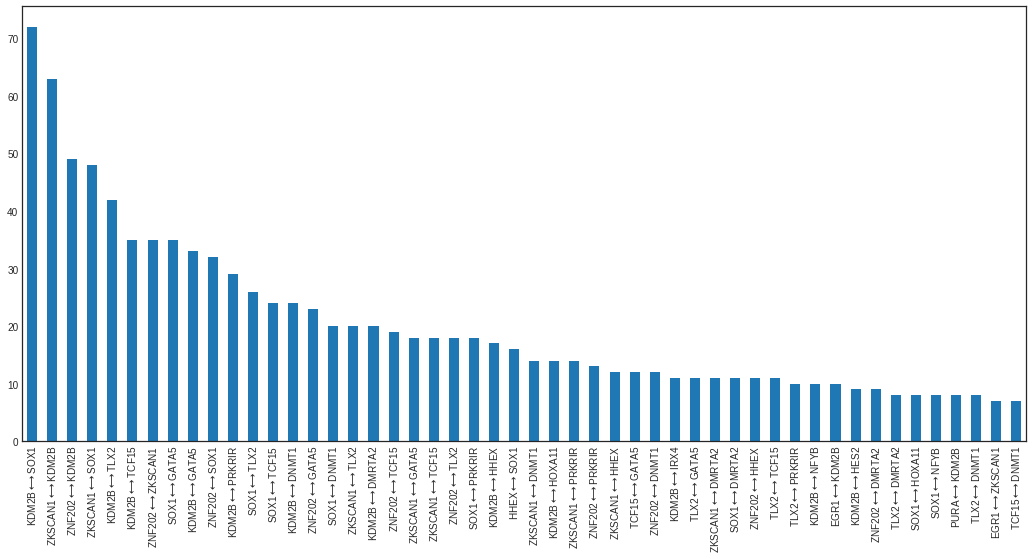

In [50]:
df['TF_interaction'].value_counts()[:50].plot(kind='bar', figsize=(18,8))

### Distribution of mean distance of interaction

Text(0.5, 1.0, 'Distribution of motif interaction distances')

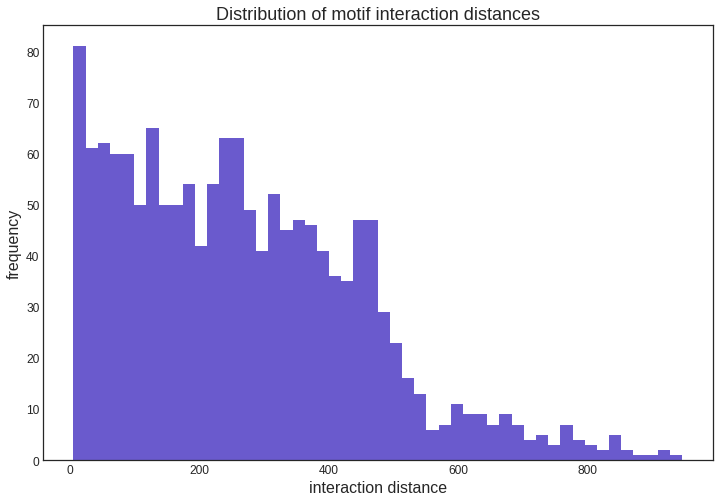

In [51]:
ax = df['mean_distance'].plot(kind='hist',bins=50, figsize=(12,8),color='slateblue',fontsize=12)
ax.set_xlabel("interaction distance",fontsize=16)
ax.set_ylabel("frequency",fontsize=16)
ax.xaxis.set_tick_params(rotation=0)
ax.set_title('Distribution of motif interaction distances',fontsize=18)

In [52]:
df['mean_distance'].mean(),df['mean_distance'].median()

(269.97646267652993, 248.0)

### Most Frequent TF Family Interactions

In [53]:
tf_family_dict = {}
for TF in df_annotate['TF_Name']:
    tf_family_dict[TF] = df_annotate[df_annotate['TF_Name']==TF]['Family_Name'].iloc[0]

In [54]:
df['TF1_Family'] = df['TF1'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')
df['TF2_Family'] = df['TF2'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')

In [55]:
df.head(10)

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family
0,1,filter4<-->filter12,797,M0404_1.02,0.002552,M0607_1.02,0.042667,243.0,284.0,266.0,156.0,0.021802,0.046372,ZNF202,KDM2B,ZNF202$\longleftrightarrow$KDM2B,C2H2 ZF,CxxC
1,5,filter4<-->filter25,810,M0404_1.02,0.002552,M4459_1.02,0.011227,365.0,60.0,240.0,289.0,0.000253,0.001646,ZNF202,EGR1,ZNF202$\longleftrightarrow$EGR1,C2H2 ZF,C2H2 ZF
2,16,filter4<-->filter54,839,M0404_1.02,0.002552,M0408_1.02,0.015368,51.0,603.0,253.0,190.0,0.001194,0.005203,ZNF202,ZKSCAN1,ZNF202$\longleftrightarrow$ZKSCAN1,C2H2 ZF,C2H2 ZF
3,18,filter4<-->filter61,846,M0404_1.02,0.002552,M1592_1.02,0.012308,481.0,37.0,286.0,198.0,0.010933,0.027505,ZNF202,SOX3,ZNF202$\longleftrightarrow$SOX3,C2H2 ZF,Sox
4,20,filter4<-->filter63,848,M0404_1.02,0.002552,M0891_1.02,0.016045,87.0,55.0,248.0,182.0,0.000990,0.004513,ZNF202,TLX2,ZNF202$\longleftrightarrow$TLX2,C2H2 ZF,Homeodomain
5,21,filter4<-->filter64,849,M0404_1.02,0.002552,M1605_1.02,0.001027,202.0,329.0,307.0,295.0,0.000183,0.001306,ZNF202,SOX1,ZNF202$\longleftrightarrow$SOX1,C2H2 ZF,Sox
6,22,filter4<-->filter65,850,M0404_1.02,0.002552,M1605_1.02,0.027169,355.0,715.0,177.0,108.0,0.002208,0.008241,ZNF202,SOX1,ZNF202$\longleftrightarrow$SOX1,C2H2 ZF,Sox
7,25,filter4<-->filter69,854,M0404_1.02,0.002552,M0607_1.02,0.030442,244.0,281.0,185.0,195.0,0.004593,0.014283,ZNF202,KDM2B,ZNF202$\longleftrightarrow$KDM2B,C2H2 ZF,CxxC
8,26,filter4<-->filter70,855,M0404_1.02,0.002552,M4850_1.02,0.047290,289.0,81.0,305.0,292.0,0.001961,0.007544,ZNF202,TCF15,ZNF202$\longleftrightarrow$TCF15,C2H2 ZF,bHLH
9,29,filter4<-->filter75,860,M0404_1.02,0.002552,M6257_1.02,0.008268,16.0,192.0,256.0,191.0,0.007022,0.019715,ZNF202,GATA5,ZNF202$\longleftrightarrow$GATA5,C2H2 ZF,GATA


In [56]:
df['Family_Interaction'] = df.apply(lambda x: x['TF1_Family']+r'$\longleftrightarrow$'+x['TF2_Family'],axis=1)

In [57]:
all_interactions_dict = []
for i in range(df.shape[0]):
    TF1 = df['TF1_Family'][i]
    TF2 = df['TF2_Family'][i]
    TF_intr = TF1+r'$\longleftrightarrow$'+TF2
    TF_intr_rev = TF2+r'$\longleftrightarrow$'+TF1
    if TF_intr not in all_interactions_dict and TF_intr_rev not in all_interactions_dict:
        all_interactions_dict.append(TF_intr)
    elif TF_intr in all_interactions_dict:
        df['Family_Interaction'][i] = TF_intr
    elif TF_intr_rev in all_interactions_dict:
        df['Family_Interaction'][i] = TF_intr_rev

/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [58]:
df.head()

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family,Family_Interaction
0,1,filter4<-->filter12,797,M0404_1.02,0.002552,M0607_1.02,0.042667,243.0,284.0,266.0,156.0,0.021802,0.046372,ZNF202,KDM2B,ZNF202$\longleftrightarrow$KDM2B,C2H2 ZF,CxxC,C2H2 ZF$\longleftrightarrow$CxxC
1,5,filter4<-->filter25,810,M0404_1.02,0.002552,M4459_1.02,0.011227,365.0,60.0,240.0,289.0,0.000253,0.001646,ZNF202,EGR1,ZNF202$\longleftrightarrow$EGR1,C2H2 ZF,C2H2 ZF,C2H2 ZF$\longleftrightarrow$C2H2 ZF
2,16,filter4<-->filter54,839,M0404_1.02,0.002552,M0408_1.02,0.015368,51.0,603.0,253.0,190.0,0.001194,0.005203,ZNF202,ZKSCAN1,ZNF202$\longleftrightarrow$ZKSCAN1,C2H2 ZF,C2H2 ZF,C2H2 ZF$\longleftrightarrow$C2H2 ZF
3,18,filter4<-->filter61,846,M0404_1.02,0.002552,M1592_1.02,0.012308,481.0,37.0,286.0,198.0,0.010933,0.027505,ZNF202,SOX3,ZNF202$\longleftrightarrow$SOX3,C2H2 ZF,Sox,C2H2 ZF$\longleftrightarrow$Sox
4,20,filter4<-->filter63,848,M0404_1.02,0.002552,M0891_1.02,0.016045,87.0,55.0,248.0,182.0,0.000990,0.004513,ZNF202,TLX2,ZNF202$\longleftrightarrow$TLX2,C2H2 ZF,Homeodomain,C2H2 ZF$\longleftrightarrow$Homeodomain


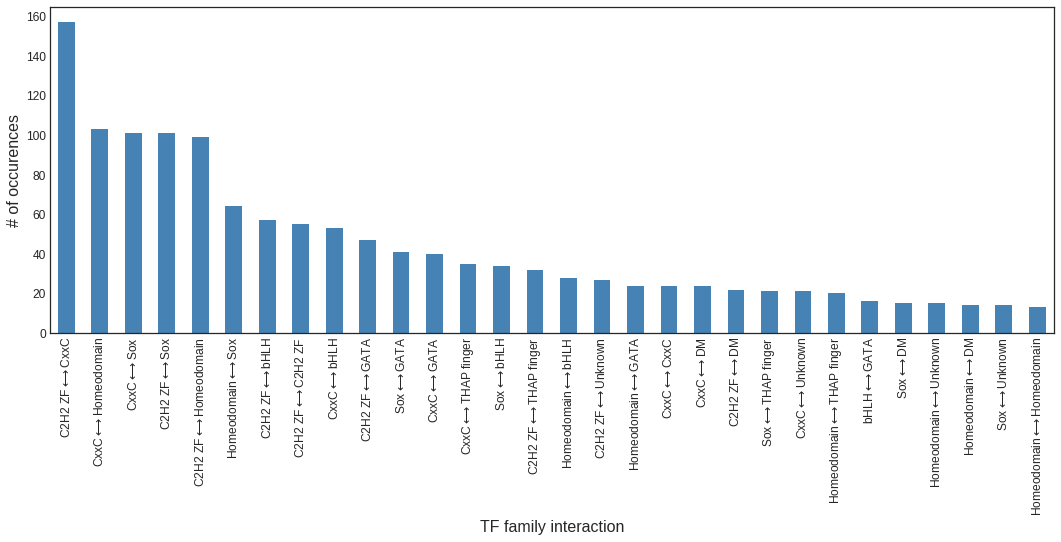

In [59]:
ax = df['Family_Interaction'].value_counts()[:30].plot(kind='bar',color='steelblue',figsize=(18,6),fontsize=12)
ax.set_xlabel("TF family interaction",fontsize=16)
ax.set_ylabel("# of occurences",fontsize=16)
ax.xaxis.set_tick_params(rotation=90)


In [60]:
len(df['TF_interaction'].value_counts()),np.median(df['TF_interaction'].value_counts())

(235, 3.0)

In [61]:
df['motifsOnlyInt'] = df['TF1']+':'+df['TF2']
df['familyOnlyInt'] = df['TF1_Family']+':'+df['TF2_Family']
df.to_csv('DFIM_TAL-GATA-All_Final.txt',sep='\t')

In [62]:
df.head()

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,...,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family,Family_Interaction,motifsOnlyInt,familyOnlyInt
0,1,filter4<-->filter12,797,M0404_1.02,0.002552,M0607_1.02,0.042667,243.0,284.0,266.0,...,0.021802,0.046372,ZNF202,KDM2B,ZNF202$\longleftrightarrow$KDM2B,C2H2 ZF,CxxC,C2H2 ZF$\longleftrightarrow$CxxC,ZNF202:KDM2B,C2H2 ZF:CxxC
1,5,filter4<-->filter25,810,M0404_1.02,0.002552,M4459_1.02,0.011227,365.0,60.0,240.0,...,0.000253,0.001646,ZNF202,EGR1,ZNF202$\longleftrightarrow$EGR1,C2H2 ZF,C2H2 ZF,C2H2 ZF$\longleftrightarrow$C2H2 ZF,ZNF202:EGR1,C2H2 ZF:C2H2 ZF
2,16,filter4<-->filter54,839,M0404_1.02,0.002552,M0408_1.02,0.015368,51.0,603.0,253.0,...,0.001194,0.005203,ZNF202,ZKSCAN1,ZNF202$\longleftrightarrow$ZKSCAN1,C2H2 ZF,C2H2 ZF,C2H2 ZF$\longleftrightarrow$C2H2 ZF,ZNF202:ZKSCAN1,C2H2 ZF:C2H2 ZF
3,18,filter4<-->filter61,846,M0404_1.02,0.002552,M1592_1.02,0.012308,481.0,37.0,286.0,...,0.010933,0.027505,ZNF202,SOX3,ZNF202$\longleftrightarrow$SOX3,C2H2 ZF,Sox,C2H2 ZF$\longleftrightarrow$Sox,ZNF202:SOX3,C2H2 ZF:Sox
4,20,filter4<-->filter63,848,M0404_1.02,0.002552,M0891_1.02,0.016045,87.0,55.0,248.0,...,0.000990,0.004513,ZNF202,TLX2,ZNF202$\longleftrightarrow$TLX2,C2H2 ZF,Homeodomain,C2H2 ZF$\longleftrightarrow$Homeodomain,ZNF202:TLX2,C2H2 ZF:Homeodomain


### Annotate Interactions using TRUSTv2 (and other sources)

In [63]:
#dictionaries with genes/TFs as keys and [target_gene/TF, role, PUBMID ID] as value
with open('/s/jawar/h/nobackup/fahad/Human_Chromatin/TRUSTv2/human_co-regulate_dict.pckl','rb') as f:
    human_dict = pickle.load(f)

    
with open('/s/jawar/h/nobackup/fahad/Human_Chromatin/TRUSTv2/mouse_co-regulate_dict.pckl','rb') as f:
    mouse_dict = pickle.load(f)  

In [64]:
def annotate_interaction(x, intr_dict = None):
    TFs_A,TFs_B = x.split(r'$\longleftrightarrow$')
    TFs_A = TFs_A.split(',')
    TFs_B = TFs_B.split(',')
    
    for TF_A in TFs_A:
        if TF_A not in intr_dict:
            continue
        for TF_B in TFs_B:
            if TF_B not in intr_dict:
                continue
            TF_A_targets = intr_dict[TF_A][:,0]
            TF_B_targets = intr_dict[TF_B][:,0]
            if len(set.intersection(set(TF_A_targets),set(TF_B_targets))) != 0:
                return 1 #interaction found (the two TFs have shared targets)
            
    
    return 0

In [65]:
df['Interaction_in_TRUSTv2'] = df['TF_interaction'].apply(annotate_interaction, intr_dict = human_dict)

In [66]:
df['Interaction_in_TRUSTv2'].value_counts()

0    1479
1       8
Name: Interaction_in_TRUSTv2, dtype: int64

In [67]:
df_resTRUSTv2 = df[df['Interaction_in_TRUSTv2']==1][df.columns[[0,1,3,4,5,6,7,8,12,13,14,15,16,17,18]]]

In [68]:
df_resTRUSTv2[['TF_interaction','TF1_Family','TF2_Family','adjusted_pval']].groupby('TF_interaction').max()

,TF1_Family,TF2_Family,adjusted_pval
TF_interaction,,,
EGR1$\longleftrightarrow$DNMT1,C2H2 ZF,CxxC,0.000389
EGR1$\longleftrightarrow$NFYB,C2H2 ZF,Unknown,0.001969
ESR2$\longleftrightarrow$DNMT1,Nuclear receptor,CxxC,0.018875
ESR2$\longleftrightarrow$NFYB,Nuclear receptor,Unknown,0.000780
GFI1$\longleftrightarrow$ESR2,C2H2 ZF,Nuclear receptor,0.022309
PURA$\longleftrightarrow$NFYB,Unknown,Unknown,0.041805
